# Prólego
Alejandro Zaccour & Ming Xuan Wu

In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_multilabel_classification

from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


# Loading the Dataset

In [2]:
number_of_transactions = 2

In [3]:
data = pd.read_parquet('train.parquet').groupby('customer_ID').tail(number_of_transactions).set_index('customer_ID', drop=True).sort_index()
labels = pd.read_csv('train_labels.csv').set_index('customer_ID', drop=True).sort_index()

**Merging the Training data with Labels**

In [4]:
train_df = pd.merge(data, labels, left_index=True, right_index=True)  

In [5]:
train_df.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-02-21,0.937349,0,0.019837,1.008307,0.000607,0.102985,0.0,0.007454,NaN,...,-1,-1,0,0,0.0,NaN,0,0.006346,0,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934745,0,0.009382,1.007647,0.006104,0.135021,0.0,0.007174,NaN,...,-1,-1,0,0,0.0,NaN,0,0.002970,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-02-06,0.878856,18,0.034558,1.005419,0.007248,0.159486,0.0,0.008733,NaN,...,-1,-1,0,0,0.0,NaN,0,0.002528,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880519,6,0.034684,1.004028,0.006911,0.165509,0.0,0.005068,NaN,...,-1,-1,0,0,0.0,NaN,0,0.003169,0,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-02-09,0.866342,0,0.008318,0.818953,0.006756,NaN,0.0,0.004373,NaN,...,-1,-1,0,0,0.0,NaN,0,0.007325,0,0


In [6]:
print("The number of observations in Training Dataset is :",len(train_df))

The number of observations in Training Dataset is : 912706


In [7]:
train_df.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-02-21,0.937349,0,0.019837,1.008307,0.000607,0.102985,0.0,0.007454,NaN,...,-1,-1,0,0,0.0,NaN,0,0.006346,0,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934745,0,0.009382,1.007647,0.006104,0.135021,0.0,0.007174,NaN,...,-1,-1,0,0,0.0,NaN,0,0.002970,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-02-06,0.878856,18,0.034558,1.005419,0.007248,0.159486,0.0,0.008733,NaN,...,-1,-1,0,0,0.0,NaN,0,0.002528,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880519,6,0.034684,1.004028,0.006911,0.165509,0.0,0.005068,NaN,...,-1,-1,0,0,0.0,NaN,0,0.003169,0,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-02-09,0.866342,0,0.008318,0.818953,0.006756,NaN,0.0,0.004373,NaN,...,-1,-1,0,0,0.0,NaN,0,0.007325,0,0


**Descriptive Statistics**

In [8]:
train_df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,906552.000000,912706.000000,912706.000000,9.125830e+05,9.127060e+05,745687.000000,912583.000000,9.125830e+05,120435.000000,6.449100e+05,...,912706.000000,912706.000000,912706.000000,912706.000000,905398.000000,159262.000000,912706.000000,9.126170e+05,912706.000000,912706.000000
mean,0.636799,6.456304,0.138035,5.923208e-01,1.029318e-01,0.229894,0.085989,1.538056e-01,0.179276,1.627040e-01,...,-0.962624,-0.951849,0.166488,0.023874,0.162263,0.394201,0.166391,5.204723e-02,0.633433,0.258503
std,0.264099,12.375271,0.229371,4.116640e-01,2.688321e-01,0.199344,0.280976,2.545957e-01,0.252493,2.262265e-01,...,0.191303,0.265015,0.393426,0.153294,0.350627,0.241014,0.393343,1.815970e-01,2.163156,0.437812
min,-0.458955,0.000000,-3.571172,2.024839e-07,5.646122e-08,-0.508883,0.000000,1.028956e-08,-0.000327,5.429255e-07,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-0.014539,-1.000000,1.995319e-08,-1.000000,0.000000
25%,0.451598,0.000000,0.009005,7.178548e-02,2.946978e-03,0.127834,0.000000,5.450183e-03,0.032310,4.321236e-02,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.199730,0.000000,2.751625e-03,0.000000,0.000000
50%,0.682277,0.000000,0.033369,8.134166e-01,5.900606e-03,0.165132,0.000000,1.065207e-02,0.110210,9.189411e-02,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.386400,0.000000,5.502113e-03,0.000000,0.000000
75%,0.861331,9.000000,0.152085,1.001992e+00,8.853793e-03,0.266043,0.000000,2.076588e-01,0.233323,1.935486e-01,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.573420,0.000000,8.251858e-03,0.000000,1.000000
max,1.010000,178.000000,1.324059,1.010000e+00,2.759738e+00,4.437958,8.988807,1.625262e+00,4.191119,1.011162e+01,...,1.000000,5.000000,1.000000,1.000000,1.339910,2.229368,1.000000,1.343326e+00,53.000000,1.000000


**Visualisation**

Count Plot of the Target Variable

<AxesSubplot:xlabel='target', ylabel='count'>

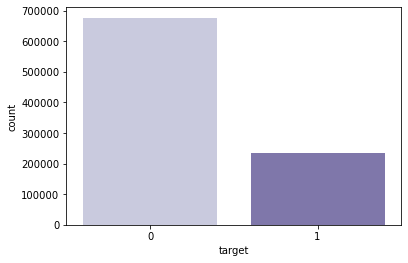

In [9]:
sns.set_palette(palette='Purples', n_colors=2, desat=1)

sns.countplot(x = 'target',data = train_df  )

# Pre-Processing

**Dropping the Transaction Dates**

In [10]:
drop_cols = ['S_2'] 
train_df.drop(drop_cols, inplace=True, axis=1)

In [11]:
nums=[col for col in train_df if col != 'target']

In [12]:
target = labels


In [13]:
#agregado de los clientes (con mean, max, ...)
train_nums=train_df.groupby('customer_ID')[nums].agg(['mean','std','min','max','last'])
train_nums.columns=['_'.join(i) for i in train_nums.columns]
train_nums

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_144_mean,D_144_std,D_144_min,D_144_max,D_144_last,D_145_mean,D_145_std,D_145_min,D_145_max,D_145_last
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.936047,0.001841,0.934745,0.937349,0.934745,0.0,0.000000,0,0,0,...,0.004658,0.002387,0.002970,0.006346,0.002970,0.0,0.0,0,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.879688,0.001176,0.878856,0.880519,0.880519,12.0,8.485281,6,18,6,...,0.002849,0.000453,0.002528,0.003169,0.003169,0.0,0.0,0,0,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.873608,0.010276,0.866342,0.880875,0.880875,0.0,0.000000,0,0,0,...,0.004079,0.004590,0.000834,0.007325,0.000834,0.0,0.0,0,0,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.622584,0.001142,0.621776,0.623392,0.621776,0.0,0.000000,0,0,0,...,0.005189,0.000524,0.004819,0.005560,0.005560,0.0,0.0,0,0,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.875569,0.005189,0.871900,0.879238,0.871900,0.0,0.000000,0,0,0,...,0.006634,0.000437,0.006325,0.006944,0.006944,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0.828347,0.022461,0.812465,0.844229,0.844229,7.5,10.606602,0,15,15,...,0.004015,0.001422,0.003009,0.005021,0.003009,0.0,0.0,0,0,0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.835069,0.005360,0.831279,0.838860,0.831279,1.0,0.000000,1,1,1,...,0.009598,0.000521,0.009230,0.009966,0.009230,0.0,0.0,0,0,0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.793664,0.009699,0.786806,0.800522,0.800522,8.5,0.707107,8,9,9,...,0.004067,0.005271,0.000340,0.007795,0.000340,0.0,0.0,0,0,0


In [14]:
train_df = train_nums.join(target)

In [15]:
train_df

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_144_std,D_144_min,D_144_max,D_144_last,D_145_mean,D_145_std,D_145_min,D_145_max,D_145_last,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.936047,0.001841,0.934745,0.937349,0.934745,0.0,0.000000,0,0,0,...,0.002387,0.002970,0.006346,0.002970,0.0,0.0,0,0,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.879688,0.001176,0.878856,0.880519,0.880519,12.0,8.485281,6,18,6,...,0.000453,0.002528,0.003169,0.003169,0.0,0.0,0,0,0,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.873608,0.010276,0.866342,0.880875,0.880875,0.0,0.000000,0,0,0,...,0.004590,0.000834,0.007325,0.000834,0.0,0.0,0,0,0,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.622584,0.001142,0.621776,0.623392,0.621776,0.0,0.000000,0,0,0,...,0.000524,0.004819,0.005560,0.005560,0.0,0.0,0,0,0,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.875569,0.005189,0.871900,0.879238,0.871900,0.0,0.000000,0,0,0,...,0.000437,0.006325,0.006944,0.006944,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0.828347,0.022461,0.812465,0.844229,0.844229,7.5,10.606602,0,15,15,...,0.001422,0.003009,0.005021,0.003009,0.0,0.0,0,0,0,0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.835069,0.005360,0.831279,0.838860,0.831279,1.0,0.000000,1,1,1,...,0.000521,0.009230,0.009966,0.009230,0.0,0.0,0,0,0,0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.793664,0.009699,0.786806,0.800522,0.800522,8.5,0.707107,8,9,9,...,0.005271,0.000340,0.007795,0.000340,0.0,0.0,0,0,0,0


**Creating Training Labels and Data**

In [16]:
y = train_df['target']
X = train_df.drop('target', axis=1)

**Handling missing values**

Missing values are imputed with the respective column mean.

In [17]:
col_names = X.columns
imputer = SimpleImputer()
X = pd.DataFrame(imputer.fit_transform(X))  
X.columns = col_names

**Standardization**

To ascertain features are standardized by subtracting mean and scaling to unit variance.

In [18]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns) 

**Splitting into training and validation sets**

The stratify method ensures that target variable does not get improperly distrubted leading to class imbalance.

In [19]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, shuffle=True, stratify=y, test_size=0.2)

Memory cleanup to prevent out of memory error.

In [20]:
del data, labels, X, y
gc.collect()

0

# Model Building

**Logistic Regression**

In [146]:
clf_lr = LogisticRegression(n_jobs=1, C=1e5)
clf_lr.fit(train_X, train_y)

/Users/alejandrozaccour/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0, n_jobs=1)

In [147]:
%%time
y_pred_val_lr = clf_lr.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_lr))
print("\n")
print(classification_report(val_y, y_pred_val_lr))

Accuracy on Validation set : 0.8974210910517199


              precision    recall  f1-score   support

           0       0.92      0.94      0.93     68017
           1       0.82      0.78      0.80     23766

    accuracy                           0.90     91783
   macro avg       0.87      0.86      0.86     91783
weighted avg       0.90      0.90      0.90     91783

CPU times: user 779 ms, sys: 992 ms, total: 1.77 s
Wall time: 2.67 s


<AxesSubplot:>

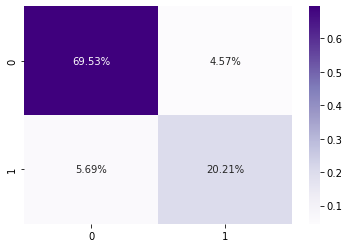

In [148]:
cf_matrix = confusion_matrix(val_y, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')

The AUC of the model is: 0.8593687436089307


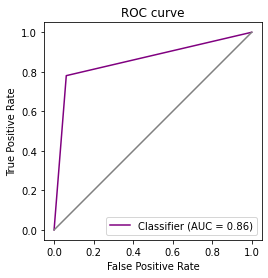

In [149]:
print('The AUC of the model is:', roc_auc_score(val_y, y_pred_val_lr, multi_class='ovr'))

RocCurveDisplay.from_predictions(
    val_y,
    y_pred_val_lr,
    color="purple",
)
plt.plot([0, 1], [0, 1] , color = 'grey')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

**Decision Tree Classifier**

In [29]:
dc = DecisionTreeClassifier(random_state=0)
dc.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

In [30]:
%%time
y_pred_val_dc = dc.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_dc))
print("\n")
print(classification_report(val_y, y_pred_val_dc))

Accuracy on Validation set : 0.8442522035671094


              precision    recall  f1-score   support

           0       0.89      0.90      0.89     68017
           1       0.70      0.70      0.70     23766

    accuracy                           0.84     91783
   macro avg       0.80      0.80      0.80     91783
weighted avg       0.84      0.84      0.84     91783

CPU times: user 265 ms, sys: 491 ms, total: 755 ms
Wall time: 1.58 s


In [150]:
accuracy = metrics.accuracy_score(val_y, y_pred_val_dc) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(val_y, y_pred_val_dc)
print("Confusion matrix = ")
print(conf_matrix)

# Precision score.
precision = metrics.precision_score(val_y, y_pred_val_dc)
print("Precision = {:0.1f}%".format(100 * precision))

# Recall score.
recall = metrics.recall_score(val_y, y_pred_val_dc)
print("Recall    = {:0.1f}%".format(100 * recall))

Accuracy = 84.4%
Confusion matrix = 
[[60917  7100]
 [ 7195 16571]]
Precision = 70.0%
Recall    = 69.7%


<AxesSubplot:>

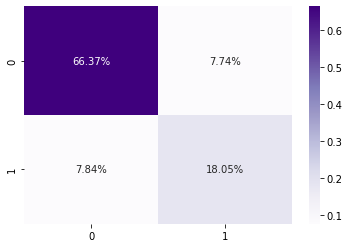

In [31]:
cf_matrix = confusion_matrix(val_y, y_pred_val_dc)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')

The AUC of the model is: 0.7964354583743192


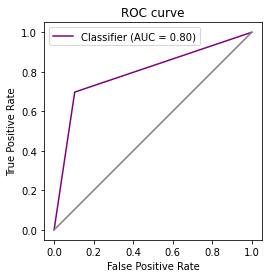

In [32]:
print('The AUC of the model is:', roc_auc_score(val_y, y_pred_val_dc, multi_class='ovr'))

RocCurveDisplay.from_predictions(
    val_y,
    y_pred_val_dc,
    color="purple",
)
plt.plot([0, 1], [0, 1] , color = 'grey')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

**XGBoost**

In [33]:
xgb = XGBClassifier()
xgb.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [34]:
%%time
y_pred_val_xgb = xgb.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_xgb))
print("\n")
print(classification_report(val_y, y_pred_val_xgb))

Accuracy on Validation set : 0.8972794526219452


              precision    recall  f1-score   support

           0       0.93      0.93      0.93     68017
           1       0.81      0.79      0.80     23766

    accuracy                           0.90     91783
   macro avg       0.87      0.86      0.87     91783
weighted avg       0.90      0.90      0.90     91783

CPU times: user 8.18 s, sys: 1.75 s, total: 9.92 s
Wall time: 2.09 s


<AxesSubplot:>

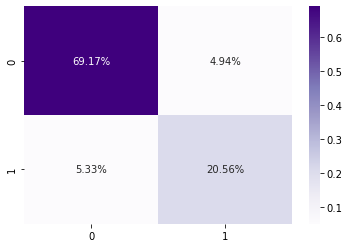

In [35]:
cf_matrix = confusion_matrix(val_y, y_pred_val_xgb)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')

In [151]:
accuracy = metrics.accuracy_score(val_y, y_pred_val_xgb) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(val_y, y_pred_val_xgb)
print("Confusion matrix = ")
print(conf_matrix)

# Precision score.
precision = metrics.precision_score(val_y, y_pred_val_xgb)
print("Precision = {:0.1f}%".format(100 * precision))

# Recall score.
recall = metrics.recall_score(val_y, y_pred_val_xgb)
print("Recall    = {:0.1f}%".format(100 * recall))

Accuracy = 89.7%
Confusion matrix = 
[[63485  4532]
 [ 4896 18870]]
Precision = 80.6%
Recall    = 79.4%


The AUC of the model is: 0.8636805075428945


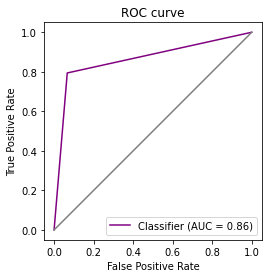

In [36]:
print('The AUC of the model is:', roc_auc_score(val_y, y_pred_val_xgb, multi_class='ovr'))

RocCurveDisplay.from_predictions(
    val_y,
    y_pred_val_xgb,
    color="purple",
)
plt.plot([0, 1], [0, 1] , color = 'grey')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

**Neural Network**

In [37]:
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(train_X, train_y)

/Users/alejandrozaccour/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(max_iter=300, random_state=1)

In [38]:
%%time
y_pred_val_mlp = mlp.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_mlp))
print("\n")
print(classification_report(val_y, y_pred_val_mlp))

Accuracy on Validation set : 0.8837148491550723


              precision    recall  f1-score   support

           0       0.92      0.92      0.92     68017
           1       0.77      0.78      0.78     23766

    accuracy                           0.88     91783
   macro avg       0.85      0.85      0.85     91783
weighted avg       0.88      0.88      0.88     91783

CPU times: user 1.68 s, sys: 1.03 s, total: 2.71 s
Wall time: 2.83 s


<AxesSubplot:>

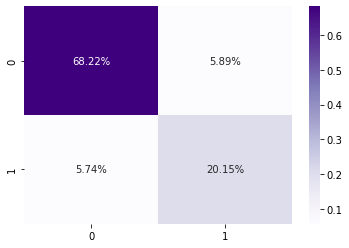

In [39]:
cf_matrix = confusion_matrix(val_y, y_pred_val_mlp)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')

In [153]:
accuracy = metrics.accuracy_score(val_y, y_pred_val_mlp) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(val_y, y_pred_val_mlp)
print("Confusion matrix = ")
print(conf_matrix)

# Precision score.
precision = metrics.precision_score(val_y, y_pred_val_mlp)
print("Precision = {:0.1f}%".format(100 * precision))

# Recall score.
recall = metrics.recall_score(val_y, y_pred_val_mlp)
print("Recall    = {:0.1f}%".format(100 * recall))

Accuracy = 88.4%
Confusion matrix = 
[[62613  5404]
 [ 5269 18497]]
Precision = 77.4%
Recall    = 77.8%


The AUC of the model is: 0.8494230004309913


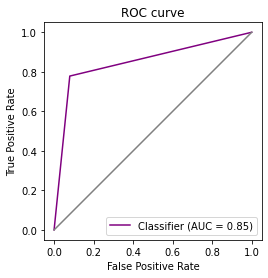

In [40]:
print('The AUC of the model is:', roc_auc_score(val_y, y_pred_val_mlp, multi_class='ovr'))

RocCurveDisplay.from_predictions(
    val_y,
    y_pred_val_mlp,
    color="purple",
)
plt.plot([0, 1], [0, 1] , color = 'grey')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

**Listing Accuracies on Validation Data by Models so far**

In [41]:
print('\nAccuracy of the Logistic Regression :',accuracy_score(val_y, y_pred_val_lr))
print('\nAccuracy of the Decision Tree :',accuracy_score(val_y, y_pred_val_dc))
print('\nAccuracy of the Neural Network :',accuracy_score(val_y, y_pred_val_mlp))
print('\nAccuracy of the XGBoost :',accuracy_score(val_y, y_pred_val_xgb))


Accuracy of the Logistic Regression : 0.8974210910517199

Accuracy of the Decision Tree : 0.8442522035671094

Accuracy of the Neural Network : 0.8837148491550723

Accuracy of the XGBoost : 0.8972794526219452


**Listing ROC by Models so far**

In [42]:
print('ROC of Logistic Regression :', roc_auc_score(val_y, y_pred_val_lr, multi_class='ovr'))
print('\nROC of Decision Tree :', roc_auc_score(val_y, y_pred_val_dc, multi_class='ovr'))
print('\nROC of Neural Network :', roc_auc_score(val_y, y_pred_val_mlp, multi_class='ovr'))
print('\nROC of XGBoost :', roc_auc_score(val_y, y_pred_val_xgb, multi_class='ovr'))

ROC of Logistic Regression : 0.8593687436089307

ROC of Decision Tree : 0.7964354583743192

ROC of Neural Network : 0.8494230004309913

ROC of XGBoost : 0.8636805075428945


# Inferences

The best accuracy is obtained using Light GBM Classifier.

# Points for Future Scope


*   Using PCA during Pre-processing to select the important contributing factors
*   Using a Custom Neural Network


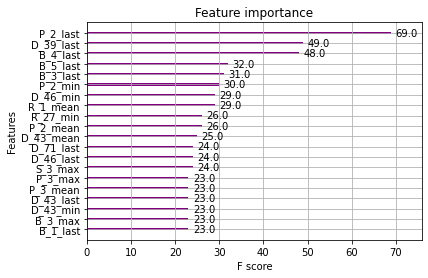

In [43]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb, max_num_features=20, color = 'Purple')
pyplot.show()

In [44]:
from collections import Counter

list_features = []

features = xgb.get_booster().feature_names

for i in features:
    list_features.append(i[0])   

list_features = Counter(list_features)
keys = list_features.keys()
values = list_features.values()


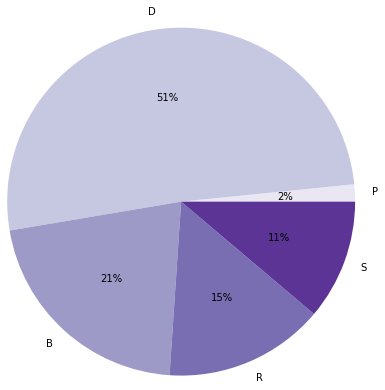

In [45]:
sns.set_palette(palette='Purples', n_colors=5, desat=1)
plt.pie(values, labels = keys, autopct='%.0f%%', radius=2)
plt.show()

In [145]:
list_features

Counter({'P': 15, 'D': 480, 'B': 200, 'R': 140, 'S': 105})